In [1]:
!pip install kaggle

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score, accuracy_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import GridSearchCV
from sklearn.feature_extraction import DictVectorizer
from sklearn.linear_model import LogisticRegression

In [3]:
df = pd.read_csv("Thyroid_Diff.csv")
df.head()

,Age,Gender,Smoking,Hx Smoking,Hx Radiothreapy,Thyroid Function,Physical Examination,Adenopathy,Pathology,Focality,Risk,T,N,M,Stage,Response,Recurred
0,27,F,No,No,No,Euthyroid,Single nodular goiter-left,No,Micropapillary,Uni-Focal,Low,T1a,N0,M0,I,Indeterminate,No
1,34,F,No,Yes,No,Euthyroid,Multinodular goiter,No,Micropapillary,Uni-Focal,Low,T1a,N0,M0,I,Excellent,No
2,30,F,No,No,No,Euthyroid,Single nodular goiter-right,No,Micropapillary,Uni-Focal,Low,T1a,N0,M0,I,Excellent,No
3,62,F,No,No,No,Euthyroid,Single nodular goiter-right,No,Micropapillary,Uni-Focal,Low,T1a,N0,M0,I,Excellent,No
4,62,F,No,No,No,Euthyroid,Multinodular goiter,No,Micropapillary,Multi-Focal,Low,T1a,N0,M0,I,Excellent,No


In [4]:
df.tail()

,Age,Gender,Smoking,Hx Smoking,Hx Radiothreapy,Thyroid Function,Physical Examination,Adenopathy,Pathology,Focality,Risk,T,N,M,Stage,Response,Recurred
378,72,M,Yes,Yes,Yes,Euthyroid,Single nodular goiter-right,Right,Papillary,Uni-Focal,High,T4b,N1b,M1,IVB,Biochemical Incomplete,Yes
379,81,M,Yes,No,Yes,Euthyroid,Multinodular goiter,Extensive,Papillary,Multi-Focal,High,T4b,N1b,M1,IVB,Structural Incomplete,Yes
380,72,M,Yes,Yes,No,Euthyroid,Multinodular goiter,Bilateral,Papillary,Multi-Focal,High,T4b,N1b,M1,IVB,Structural Incomplete,Yes
381,61,M,Yes,Yes,Yes,Clinical Hyperthyroidism,Multinodular goiter,Extensive,Hurthel cell,Multi-Focal,High,T4b,N1b,M0,IVA,Structural Incomplete,Yes
382,67,M,Yes,No,No,Euthyroid,Multinodular goiter,Bilateral,Papillary,Multi-Focal,High,T4b,N1b,M0,IVA,Structural Incomplete,Yes


In [5]:
df.describe()

,Age
count,383.000000
mean,40.866841
std,15.134494
min,15.000000
25%,29.000000
50%,37.000000
75%,51.000000
max,82.000000


In [6]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,383.0,40.866841,15.134494,15.0,29.0,37.0,51.0,82.0


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 383 entries, 0 to 382
Data columns (total 17 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   Age                   383 non-null    int64 
 1   Gender                383 non-null    object
 2   Smoking               383 non-null    object
 3   Hx Smoking            383 non-null    object
 4   Hx Radiothreapy       383 non-null    object
 5   Thyroid Function      383 non-null    object
 6   Physical Examination  383 non-null    object
 7   Adenopathy            383 non-null    object
 8   Pathology             383 non-null    object
 9   Focality              383 non-null    object
 10  Risk                  383 non-null    object
 11  T                     383 non-null    object
 12  N                     383 non-null    object
 13  M                     383 non-null    object
 14  Stage                 383 non-null    object
 15  Response              383 non-null    ob

In [8]:
df.dtypes

Age                      int64
Gender                  object
Smoking                 object
Hx Smoking              object
Hx Radiothreapy         object
Thyroid Function        object
Physical Examination    object
Adenopathy              object
Pathology               object
Focality                object
Risk                    object
T                       object
N                       object
M                       object
Stage                   object
Response                object
Recurred                object
dtype: object

In [9]:
df.columns = df.columns.str.lower()
df

,age,gender,smoking,hx smoking,hx radiothreapy,thyroid function,physical examination,adenopathy,pathology,focality,risk,t,n,m,stage,response,recurred
0,27,F,No,No,No,Euthyroid,Single nodular goiter-left,No,Micropapillary,Uni-Focal,Low,T1a,N0,M0,I,Indeterminate,No
1,34,F,No,Yes,No,Euthyroid,Multinodular goiter,No,Micropapillary,Uni-Focal,Low,T1a,N0,M0,I,Excellent,No
2,30,F,No,No,No,Euthyroid,Single nodular goiter-right,No,Micropapillary,Uni-Focal,Low,T1a,N0,M0,I,Excellent,No
3,62,F,No,No,No,Euthyroid,Single nodular goiter-right,No,Micropapillary,Uni-Focal,Low,T1a,N0,M0,I,Excellent,No
4,62,F,No,No,No,Euthyroid,Multinodular goiter,No,Micropapillary,Multi-Focal,Low,T1a,N0,M0,I,Excellent,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
378,72,M,Yes,Yes,Yes,Euthyroid,Single nodular goiter-right,Right,Papillary,Uni-Focal,High,T4b,N1b,M1,IVB,Biochemical Incomplete,Yes
379,81,M,Yes,No,Yes,Euthyroid,Multinodular goiter,Extensive,Papillary,Multi-Focal,High,T4b,N1b,M1,IVB,Structural Incomplete,Yes
380,72,M,Yes,Yes,No,Euthyroid,Multinodular goiter,Bilateral,Papillary,Multi-Focal,High,T4b,N1b,M1,IVB,Structural Incomplete,Yes
381,61,M,Yes,Yes,Yes,Clinical Hyperthyroidism,Multinodular goiter,Extensive,Hurthel cell,Multi-Focal,High,T4b,N1b,M0,IVA,Structural Incomplete,Yes


In [10]:
strings = list(df.dtypes[df.dtypes == "object"].index)
strings

['gender',
 'smoking',
 'hx smoking',
 'hx radiothreapy',
 'thyroid function',
 'physical examination',
 'adenopathy',
 'pathology',
 'focality',
 'risk',
 't',
 'n',
 'm',
 'stage',
 'response',
 'recurred']

In [11]:
df

,age,gender,smoking,hx smoking,hx radiothreapy,thyroid function,physical examination,adenopathy,pathology,focality,risk,t,n,m,stage,response,recurred
0,27,F,No,No,No,Euthyroid,Single nodular goiter-left,No,Micropapillary,Uni-Focal,Low,T1a,N0,M0,I,Indeterminate,No
1,34,F,No,Yes,No,Euthyroid,Multinodular goiter,No,Micropapillary,Uni-Focal,Low,T1a,N0,M0,I,Excellent,No
2,30,F,No,No,No,Euthyroid,Single nodular goiter-right,No,Micropapillary,Uni-Focal,Low,T1a,N0,M0,I,Excellent,No
3,62,F,No,No,No,Euthyroid,Single nodular goiter-right,No,Micropapillary,Uni-Focal,Low,T1a,N0,M0,I,Excellent,No
4,62,F,No,No,No,Euthyroid,Multinodular goiter,No,Micropapillary,Multi-Focal,Low,T1a,N0,M0,I,Excellent,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
378,72,M,Yes,Yes,Yes,Euthyroid,Single nodular goiter-right,Right,Papillary,Uni-Focal,High,T4b,N1b,M1,IVB,Biochemical Incomplete,Yes
379,81,M,Yes,No,Yes,Euthyroid,Multinodular goiter,Extensive,Papillary,Multi-Focal,High,T4b,N1b,M1,IVB,Structural Incomplete,Yes
380,72,M,Yes,Yes,No,Euthyroid,Multinodular goiter,Bilateral,Papillary,Multi-Focal,High,T4b,N1b,M1,IVB,Structural Incomplete,Yes
381,61,M,Yes,Yes,Yes,Clinical Hyperthyroidism,Multinodular goiter,Extensive,Hurthel cell,Multi-Focal,High,T4b,N1b,M0,IVA,Structural Incomplete,Yes


In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 383 entries, 0 to 382
Data columns (total 17 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   age                   383 non-null    int64 
 1   gender                383 non-null    object
 2   smoking               383 non-null    object
 3   hx smoking            383 non-null    object
 4   hx radiothreapy       383 non-null    object
 5   thyroid function      383 non-null    object
 6   physical examination  383 non-null    object
 7   adenopathy            383 non-null    object
 8   pathology             383 non-null    object
 9   focality              383 non-null    object
 10  risk                  383 non-null    object
 11  t                     383 non-null    object
 12  n                     383 non-null    object
 13  m                     383 non-null    object
 14  stage                 383 non-null    object
 15  response              383 non-null    ob

In [13]:
df.isnull().sum()

age                     0
gender                  0
smoking                 0
hx smoking              0
hx radiothreapy         0
thyroid function        0
physical examination    0
adenopathy              0
pathology               0
focality                0
risk                    0
t                       0
n                       0
m                       0
stage                   0
response                0
recurred                0
dtype: int64

In [14]:
from  sklearn.preprocessing import LabelEncoder

In [15]:
lab = LabelEncoder()

In [16]:
categorical_variables = df.select_dtypes(include=["object"]).columns
categorical_variables

Index(['gender', 'smoking', 'hx smoking', 'hx radiothreapy',
       'thyroid function', 'physical examination', 'adenopathy', 'pathology',
       'focality', 'risk', 't', 'n', 'm', 'stage', 'response', 'recurred'],
      dtype='object')

In [17]:
for c in categorical_variables:
    df[c] = lab.fit_transform(df[c])

In [18]:
df.head()

,age,gender,smoking,hx smoking,hx radiothreapy,thyroid function,physical examination,adenopathy,pathology,focality,risk,t,n,m,stage,response,recurred
0,27,0,0,0,0,2,3,3,2,1,2,0,0,0,0,2,0
1,34,0,0,1,0,2,1,3,2,1,2,0,0,0,0,1,0
2,30,0,0,0,0,2,4,3,2,1,2,0,0,0,0,1,0
3,62,0,0,0,0,2,4,3,2,1,2,0,0,0,0,1,0
4,62,0,0,0,0,2,1,3,2,0,2,0,0,0,0,1,0


In [19]:
import seaborn as sns

<Axes: >

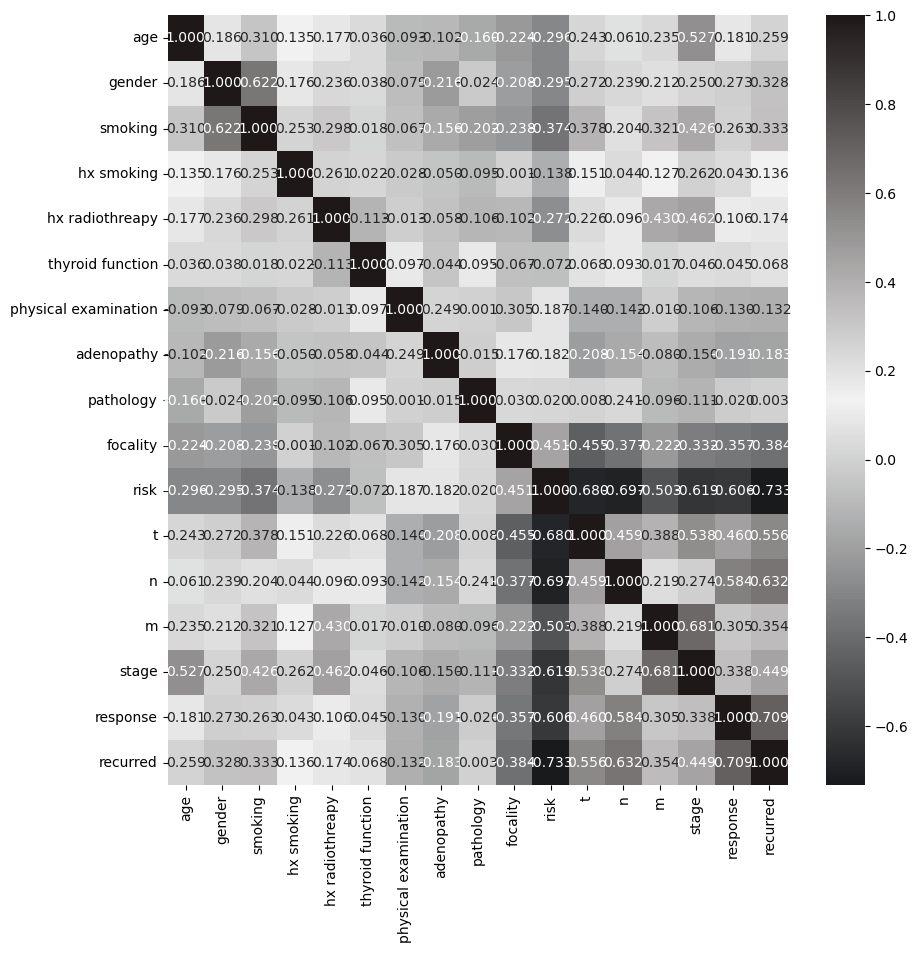

In [20]:
fig = plt.figure(figsize=(10,10))
df = df.copy()
cmap = sns.diverging_palette(250, 10, l = 9, s = 8, n = 10, as_cmap = True)
sns.heatmap(df.corr(), annot = True, fmt = '.3f', cmap = cmap)

<Axes: xlabel='recurred', ylabel='Count'>

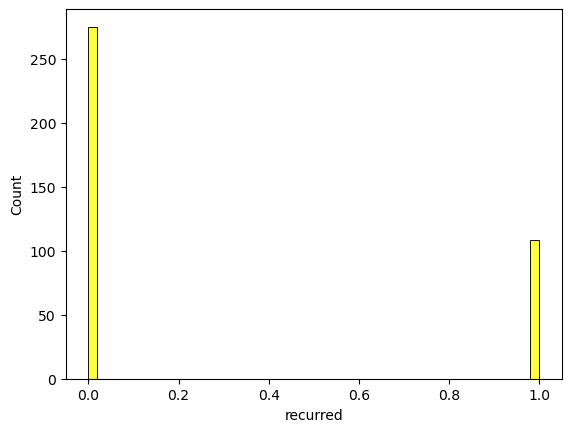

In [21]:
sns.histplot(df["recurred"], bins = 50, color = "yellow")

In [22]:
n = len(df)
n

383

In [23]:
df_full_train, df_test = train_test_split(df, random_state = 42, test_size = 0.2)

In [24]:
df_train, df_val = train_test_split(df_full_train, random_state = 42, test_size = 0.25)

In [25]:
len(df_train), len(df_test), len(df_val)

(229, 77, 77)

In [26]:
df_train

,age,gender,smoking,hx smoking,hx radiothreapy,thyroid function,physical examination,adenopathy,pathology,focality,risk,t,n,m,stage,response,recurred
217,28,0,1,0,0,0,4,3,3,1,2,2,1,0,0,2,0
267,41,1,0,0,0,2,3,3,3,1,2,3,0,0,0,1,0
58,23,0,0,0,0,0,3,3,3,1,2,1,0,0,0,1,0
85,25,0,0,1,1,2,4,3,3,1,2,1,0,0,0,1,0
156,31,1,1,0,0,2,3,3,3,1,2,2,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
206,40,0,0,0,0,2,1,2,3,1,1,2,2,0,0,2,0
81,17,0,0,1,0,2,4,3,3,1,2,1,0,0,0,1,0
193,23,0,0,0,0,2,3,2,3,1,2,2,0,0,0,1,0
174,50,0,0,0,0,2,1,3,3,1,2,2,0,0,0,2,0


In [27]:
df_train = df_train.reset_index(drop = True)
df_val = df_val.reset_index(drop = True)
df_test = df_test.reset_index(drop = True)

In [28]:
df_train

,age,gender,smoking,hx smoking,hx radiothreapy,thyroid function,physical examination,adenopathy,pathology,focality,risk,t,n,m,stage,response,recurred
0,28,0,1,0,0,0,4,3,3,1,2,2,1,0,0,2,0
1,41,1,0,0,0,2,3,3,3,1,2,3,0,0,0,1,0
2,23,0,0,0,0,0,3,3,3,1,2,1,0,0,0,1,0
3,25,0,0,1,1,2,4,3,3,1,2,1,0,0,0,1,0
4,31,1,1,0,0,2,3,3,3,1,2,2,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
224,40,0,0,0,0,2,1,2,3,1,1,2,2,0,0,2,0
225,17,0,0,1,0,2,4,3,3,1,2,1,0,0,0,1,0
226,23,0,0,0,0,2,3,2,3,1,2,2,0,0,0,1,0
227,50,0,0,0,0,2,1,3,3,1,2,2,0,0,0,2,0


In [29]:
df_val

,age,gender,smoking,hx smoking,hx radiothreapy,thyroid function,physical examination,adenopathy,pathology,focality,risk,t,n,m,stage,response,recurred
0,75,1,1,0,1,2,3,3,0,0,0,2,0,1,4,3,1
1,37,1,0,0,0,2,1,0,3,0,1,3,2,0,0,3,1
2,26,0,0,0,0,2,1,3,3,1,2,2,0,0,0,1,0
3,36,0,0,0,0,2,4,3,2,1,2,0,0,0,0,1,0
4,54,1,1,0,0,2,3,5,1,0,1,5,2,0,1,3,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
72,31,0,0,0,0,2,4,3,3,1,2,2,0,0,0,1,0
73,42,1,0,0,0,4,4,3,3,0,1,3,1,0,0,2,0
74,29,0,0,0,0,2,1,3,0,1,2,1,0,0,0,1,0
75,23,0,0,1,0,2,4,5,3,1,1,4,1,0,0,3,1


In [30]:
df_test

,age,gender,smoking,hx smoking,hx radiothreapy,thyroid function,physical examination,adenopathy,pathology,focality,risk,t,n,m,stage,response,recurred
0,32,0,0,0,0,2,3,3,3,1,2,3,0,0,0,1,0
1,30,0,0,0,0,4,2,5,0,1,2,3,0,0,0,1,0
2,30,0,0,0,0,2,1,0,3,0,1,3,2,0,0,3,1
3,51,0,0,0,0,2,3,3,0,1,1,3,0,0,0,3,1
4,43,0,0,1,0,2,4,3,3,1,2,1,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
72,33,0,0,0,0,1,4,5,3,1,2,2,0,0,0,1,0
73,55,0,0,0,0,2,3,3,3,1,2,2,0,0,0,1,0
74,54,0,0,0,0,2,1,3,3,1,2,1,0,0,0,2,0
75,34,0,0,0,0,2,4,5,3,1,1,2,2,0,0,3,1


In [31]:
y_train = df_train.recurred.values
y_val = df_val.recurred.values
y_test = df_test.recurred.values

In [32]:
del df_train["recurred"]
del df_val["recurred"]
del df_test["recurred"]

In [33]:
train_dict = df_train.fillna(0).to_dict(orient = "records")
dv = DictVectorizer(sparse = False)
x_train = dv.fit_transform(train_dict)
x_train

array([[ 3., 28.,  1., ...,  0.,  2.,  0.],
       [ 3., 41.,  1., ...,  0.,  3.,  2.],
       [ 3., 23.,  1., ...,  0.,  1.,  0.],
       ...,
       [ 2., 23.,  1., ...,  0.,  2.,  2.],
       [ 3., 50.,  1., ...,  0.,  2.,  2.],
       [ 3., 25.,  1., ...,  0.,  2.,  2.]])

In [34]:
val_dict = df_val.fillna(0).to_dict(orient = "records")
x_val = dv.transform(val_dict)
x_val

array([[ 3., 75.,  0., ...,  4.,  2.,  2.],
       [ 0., 37.,  0., ...,  0.,  3.,  2.],
       [ 3., 26.,  1., ...,  0.,  2.,  2.],
       ...,
       [ 3., 29.,  1., ...,  0.,  1.,  2.],
       [ 5., 23.,  1., ...,  0.,  4.,  2.],
       [ 3., 36.,  1., ...,  0.,  2.,  0.]])

In [35]:
test_dict = df_test.fillna(0).to_dict(orient = "records")
x_test = dv.transform(test_dict)
x_test

array([[ 3., 32.,  1., ...,  0.,  3.,  2.],
       [ 5., 30.,  1., ...,  0.,  3.,  4.],
       [ 0., 30.,  0., ...,  0.,  3.,  2.],
       ...,
       [ 3., 54.,  1., ...,  0.,  1.,  2.],
       [ 5., 34.,  1., ...,  0.,  2.,  2.],
       [ 3., 33.,  1., ...,  0.,  1.,  2.]])

In [36]:
lg = LogisticRegression(random_state = 4)
lg

LogisticRegression(random_state=4)

In [37]:
scaler = StandardScaler()
X_train = scaler.fit_transform(x_train)
X_train

array([[ 0.10282783, -0.91841449,  0.78273626, ..., -0.32959476,
        -0.18583839, -3.08258164],
       [ 0.10282783, -0.05482639,  0.78273626, ..., -0.32959476,
         0.56077549,  0.06178894],
       [ 0.10282783, -1.25056376,  0.78273626, ..., -0.32959476,
        -0.93245227, -3.08258164],
       ...,
       [-0.70915744, -1.25056376,  0.78273626, ..., -0.32959476,
        -0.18583839,  0.06178894],
       [ 0.10282783,  0.5430423 ,  0.78273626, ..., -0.32959476,
        -0.18583839,  0.06178894],
       [ 0.10282783, -1.11770405,  0.78273626, ..., -0.32959476,
        -0.18583839,  0.06178894]])

In [38]:
X_val = scaler.transform(x_val)
X_val

array([[ 0.10282783,  2.20378865, -1.27756953, ...,  5.83180925,
        -0.18583839,  0.06178894],
       [-2.33312797, -0.3205458 , -1.27756953, ..., -0.32959476,
         0.56077549,  0.06178894],
       [ 0.10282783, -1.05127419,  0.78273626, ..., -0.32959476,
        -0.18583839,  0.06178894],
       ...,
       [ 0.10282783, -0.85198463,  0.78273626, ..., -0.32959476,
        -0.93245227,  0.06178894],
       [ 1.72679836, -1.25056376,  0.78273626, ..., -0.32959476,
         1.30738937,  0.06178894],
       [ 0.10282783, -0.38697566,  0.78273626, ..., -0.32959476,
        -0.18583839, -3.08258164]])

In [39]:
X_test = scaler.transform(x_test)
X_test

array([[ 0.10282783, -0.65269507,  0.78273626, ..., -0.32959476,
         0.56077549,  0.06178894],
       [ 1.72679836, -0.78555478,  0.78273626, ..., -0.32959476,
         0.56077549,  3.20615952],
       [-2.33312797, -0.78555478, -1.27756953, ..., -0.32959476,
         0.56077549,  0.06178894],
       ...,
       [ 0.10282783,  0.80876171,  0.78273626, ..., -0.32959476,
        -0.93245227,  0.06178894],
       [ 1.72679836, -0.51983536,  0.78273626, ..., -0.32959476,
        -0.18583839,  0.06178894],
       [ 0.10282783, -0.58626522,  0.78273626, ..., -0.32959476,
        -0.93245227,  0.06178894]])

In [40]:
lg.fit(X_train, y_train)

LogisticRegression(random_state=4)

In [41]:
y_test = y_test.reshape(-1, 1)

In [42]:
y_pred = lg.predict(X_test)

In [43]:
accuracy = accuracy_score(y_test, y_pred)
accuracy

0.935064935064935

In [44]:
rf = RandomForestClassifier(max_depth = 6, random_state = 42, min_samples_leaf = 7, n_estimators = 5)
rf.fit(X_train, y_train)

RandomForestClassifier(max_depth=6, min_samples_leaf=7, n_estimators=5,
                       random_state=42)

In [45]:
y_preds = rf.predict(X_test)
accuracy = accuracy_score(y_test, y_preds)
accuracy

0.961038961038961

In [46]:
dt = DecisionTreeClassifier(max_depth = 7, random_state =42, min_samples_leaf = 6, max_features = 8)
dt.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=7, max_features=8, min_samples_leaf=6,
                       random_state=42)

In [47]:
y_predt = dt.predict(X_test)
accuracy = accuracy_score(y_test, y_predt)
accuracy

0.961038961038961

In [48]:
from sklearn.svm import SVC

In [49]:
svm = SVC(kernel = "linear")
svm.fit(X_train, y_train)

SVC(kernel='linear')

In [50]:
y_pret = svm.predict(X_test)
accuracy = accuracy_score(y_test, y_pret)
accuracy

0.922077922077922

In [51]:
### Evaluation of the model 
from sklearn.metrics import recall_score, precision_score, accuracy_score, f1_score, confusion_matrix, classification_report

In [52]:
recall = recall_score(y_test, y_predt)
precision = precision_score(y_test, y_predt)
f1 = f1_score(y_test, y_predt)
classi_report  = classification_report(y_test, y_predt)

print(f"the recall score is : {recall}")
print(f"the precision score is :{precision}")
print( f"the f1 score is :{f1}")

the recall score is : 0.8947368421052632
the precision score is :0.9444444444444444
the f1 score is :0.918918918918919


In [53]:
print(f"\n\n the classification_report of this result is \n\n: {classi_report}")



 the classification_report of this result is 

:               precision    recall  f1-score   support

           0       0.97      0.98      0.97        58
           1       0.94      0.89      0.92        19

    accuracy                           0.96        77
   macro avg       0.96      0.94      0.95        77
weighted avg       0.96      0.96      0.96        77



In [57]:
from sklearn.metrics import roc_curve, roc_auc_score

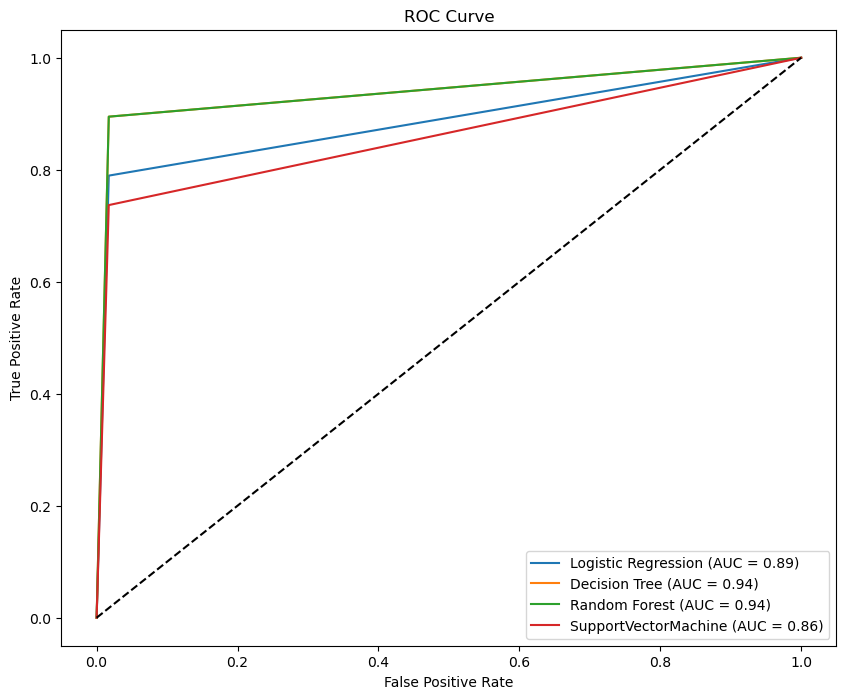

In [58]:
plt.figure(figsize=(10, 8))
for model, name in zip([lg, dt, rf, svm], ['Logistic Regression', 'Decision Tree', 'Random Forest', 'SupportVectorMachine']):
    y_pred_proba = model.predict(X_test)
    fpr, tpr, _ = roc_curve(y_test, y_pred_proba)
    auc_score = roc_auc_score(y_test, y_pred_proba)
    plt.plot(fpr, tpr, label=f'{name} (AUC = {auc_score:.2f})')

plt.plot([0, 1], [0, 1], linestyle='--', color='black')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.show()